# Best Decision Tree for Titanic
### Kaggle Titanic whit simple Decision Tree

**Step**
1. Explore df
2. Missing values and feature engineering
3. Stat Explore
4. Predictive Modeling
5. Submission

##Explore df

### Import lib

In [1]:
#import drive dir
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install seaborn
!pip install infolib

Looking in indexes: https://test.pypi.org/simple/


In [3]:
# for explore df
import os
import glob
import warnings
warnings.filterwarnings('ignore')
# from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None) # set the number of characters visible for each cell of the column
# ex. 50 = first 50 characters
# None = full text
# from matplotlib import pyplot
import matplotlib.pyplot as plt
# import matplotlib.pylab as pltlab
from infolib import info

# for pre-processing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# for stat explore
import seaborn as sns

# for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, classification_report, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# lLbrary to compute time measures
import time
import datetime

def local_time():
    # dd/mm/YY H:M:S
    print("Start at " + datetime.datetime.now().strftime("%H:%M:%S"))	

local_time()

Start at 21:47:10


###Def path

In [4]:
# paths
drive_dir = 'drive'
root = f'/content/{drive_dir}/MyDrive/Kaggle_Titanic_DecisionTree/'
staging_path = f'staging/'
try:
  os.mkdir(f'{root}{staging_path}')
  print(f'New path {staging_path} created\n')
except Exception as e:
  print(e)
test = 'test.csv'
train = 'train.csv'
chi_s_table = '/content/drive/MyDrive/Chi_square.csv'
submission = 'submission.csv'

[Errno 17] File exists: '/content/drive/MyDrive/Kaggle_Titanic_DecisionTree/staging/'


In [5]:
# import file to pandas
train = pd.read_csv(f'{root}{train}')
test = pd.read_csv(f'{root}{test}')
sub = (f'{root}{submission}')
chi_square_table = pd.read_csv(f'{chi_s_table}')
staging = f'{root}{staging_path}'

### Explore df

In [6]:
print('TRAIN INFO')
print(f'{train.info()}\n')
print(f'COUNT NAN IN TRAIN\n{train.isna().sum()}\n')
print('-'*50)
print()
print('TEST INFO')
print(f'{test.info()}\n')
print(f'COUNT NAN IN TEST\n{test.isna().sum()}')

TRAIN INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

COUNT NAN IN TRAIN
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687

In [7]:
# or whit infolib
inf(train)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 12 
 891 
 183 
 708 
 0 
 891 
 315.03 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 891 
 0 
 891 
 446.000 
 257.354 
 1.00 
 891.000 
 223.500 
 446.000 
 668.5 
 
 
 Survived 
 int64 
 891 
 0 
 2 
 0.384 
 0.487 
 0.00 
 1.000 
 0.000 
 0.000 
 1.0 
 
 
 Pclass 
 int64 
 891 
 0 
 3 
 2.309 
 0.836 
 1.00 
 3.000 
 2.000 
 3.000 
 3.0 
 
 
 Age 
 float64 
 714 
 177 
 88 
 29.699 
 14.526 
 0.42 
 80.000 
 20.125 
 28.000 
 38.0 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.00 
 8.000 
 0.000 
 0.000 
 1.0 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.00 
 6.000 
 0.000 
 0.000 
 0.0 
 
 
 Fare 
 float64 
 891 
 0 
 248 
 32.204 
 49.693 
 0.00 
 512.329 
 7.910 
 14.454 
 31.0 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 891 
 0 
 891 
 Sirayanian, Mr. Orsen 
 1 
 12 
 82 
 
 
 Sex 
 object 
 891 
 0 
 2 
 male 
 577 
 4 
 6 
 
 
 Ticket 
 object 
 891 
 0 
 681 
 1601 
 7 
 3 
 18 
 
 
 Cabin 
 object 
 204 
 687 
 147 
 B96 B98 
 4 
 1 
 15 
 
 
 Embarked 
 object 
 889 
 2 
 3 
 S 
 644 
 1 
 3 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Survived 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 570 
 571 
 1 
 2 
 Harris, Mr. George 
 male 
 62.0 
 0 
 0 
 S.W./PP 752 
 10.5000 
 NaN 
 S 
 
 
 581 
 582 
 1 
 1 
 Thayer, Mrs. John Borland (Marian Longstreth Morris) 
 female 
 39.0 
 1 
 1 
 17421 
 110.8833 
 C68 
 C 
 
 
 473 
 474 
 1 
 2 
 Jerwan, Mrs. Amin S (Marie Marthe Thuillard) 
 female 
 23.0 
 0 
 0 
 SC/AH Basle 541 
 13.7917 
 D 
 C

In [8]:
inf(test)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 11 
 418 
 87 
 331 
 0 
 418 
 144.8 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 418 
 0 
 418 
 1100.500 
 120.810 
 892.00 
 1309.000 
 996.250 
 1100.500 
 1204.75 
 
 
 Pclass 
 int64 
 418 
 0 
 3 
 2.266 
 0.842 
 1.00 
 3.000 
 1.000 
 3.000 
 3.00 
 
 
 Age 
 float64 
 332 
 86 
 79 
 30.273 
 14.181 
 0.17 
 76.000 
 21.000 
 27.000 
 39.00 
 
 
 SibSp 
 int64 
 418 
 0 
 7 
 0.447 
 0.897 
 0.00 
 8.000 
 0.000 
 0.000 
 1.00 
 
 
 Parch 
 int64 
 418 
 0 
 8 
 0.392 
 0.981 
 0.00 
 9.000 
 0.000 
 0.000 
 0.00 
 
 
 Fare 
 float64 
 417 
 1 
 169 
 35.627 
 55.908 
 0.00 
 512.329 
 7.896 
 14.454 
 31.50 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 418 
 0 
 418 
 Thomson, Mr. Alexander Morrison 
 1 
 13 
 63 
 
 
 Sex 
 object 
 418 
 0 
 2 
 male 
 266 
 4 
 6 
 
 
 Ticket 
 object 
 418 
 0 
 363 
 PC 17608 
 5 
 3 
 18 
 
 
 Cabin 
 object 
 91 
 327 
 76 
 B57 B59 B63 B66 
 3 
 1 
 15 
 
 
 Embarked 
 object 
 418 
 0 
 3 
 S 
 270 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 376 
 1268 
 3 
 Kink, Miss. Maria 
 female 
 22.0 
 2 
 0 
 315152 
 8.6625 
 NaN 
 S 
 
 
 267 
 1159 
 3 
 Warren, Mr. Charles William 
 male 
 NaN 
 0 
 0 
 C.A. 49867 
 7.5500 
 NaN 
 S 
 
 
 175 
 1067 
 2 
 Brown, Miss. Edith Eileen 
 female 
 15.0 
 0 
 2 
 29750 
 39.0000 
 NaN 
 S

In [9]:
print(f'train columns: {len(train.columns)}\n{train.columns}\n')
print(f'test columns: {len(test.columns)}\n{test.columns}')

train columns: 12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

test columns: 11
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [10]:
train.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
396,397,0,3,"Olsson, Miss. Elina",female,31.00,0,0,350407,7.8542,NaN,S


In [11]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q
211,1103,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.0500,NaN,S


In [12]:
print('Train value counts')
for i in train.columns:
  item_counts = train[i].value_counts()
  print(f'{i}: {len(item_counts)}')
print()
print('Test value counts')
for i in test.columns:
  item_counts = test[i].value_counts()
  print(f'{i}: {len(item_counts)}')

Train value counts
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3

Test value counts
PassengerId: 418
Pclass: 3
Name: 418
Sex: 2
Age: 79
SibSp: 7
Parch: 8
Ticket: 363
Fare: 169
Cabin: 76
Embarked: 3


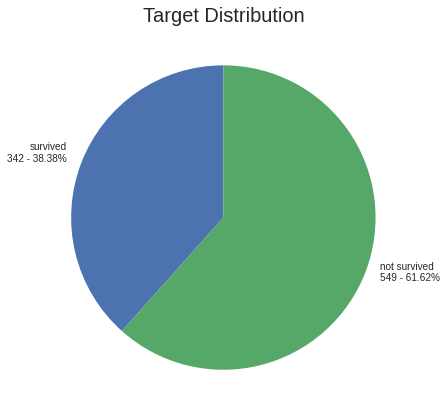

In [13]:
# exolore whit matplotlib
# how is distribuite the target?
plt.style.use('seaborn')
plt.figure(figsize=(10, 7))
plt.title('Target Distribution', fontsize=20)
y=[]
s=0
ns=0
for i in train['Survived']:
  if i==1:
    s=s+1
  else:
    ns=ns+1
y.append(s)
y.append(ns)

mylabels = [f'survived\n{s} - {round((s*100)/(s+ns),2)}%\n', f'not survived\n{ns} - {round((ns*100)/(s+ns),2)}%\n']

plt.pie(y, labels = mylabels, startangle = 90)
plt.show()

In [14]:
# since there are NaNs to be entered both in the train and in the test, I combine the 2 db
train_results = train["Survived"].copy() #dataset only with Y
train.drop("Survived", axis=1, inplace=True, errors="ignore") # I take off from train Y 
titanic = pd.concat([train, test], keys=['train','test'])
# I concatenate the 2 datasets using a multiindex (hierarchical) as the indexes overlap

In [15]:
titanic.to_csv(f'{staging}titanic_merge.csv', index=False)

In [16]:
inf(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 11 
 1309 
 270 
 1039 
 0 
 1309 
 452.74 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 295 
 1014 
 186 
 C23 C25 C27 
 6 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 
 
 
 
 train 
 150 
 151 
 2 
 Bateman, Rev. Robert James 
 male 
 51.0 
 0 
 0 
 S.O.P. 1166 
 12.5250 
 NaN 
 S 
 
 
 303 
 304 
 2 
 Keane, Miss. Nora A 
 female 
 NaN 
 0 
 0 
 226593 
 12.3500 
 E101 
 Q 
 
 
 test 
 249 
 1141 
 3 
 Khalil, Mrs. Betros (Zahie Maria" Elias)" 
 female 
 NaN 
 1 
 0 
 2660 
 14.4542 
 NaN 
 C

In [17]:
print(titanic.info())
print()
print(titanic.isna().sum())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 163.3+ KB
None

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [18]:
titanic.sample(3)

PassengerId  Pclass  ... Cabin Embarked
test  80           972       3  ...   NaN        C
train 235          236       3  ...   NaN        S
      570          571       2  ...   NaN        S

[3 rows x 11 columns]

##Pre-processing

###Feature engineering

In [19]:
'''The same ticket is made out to several people.
I calculate the total number of people for whom the ticket owned by each passenger was purchased
Lo stesso biglietto è intestato a diverse persone.
Calcolo il totale delle persone per cui è stato comprato il biglietto posseduto da ogni passeggeto'''

titanic['TicketCrew'] = titanic['Ticket'].map(titanic['Ticket'].value_counts())

'''Fare is the total price of the ticket, not the cost per person. I calculate the fare per person.
Fare è il prezzo totale del biglietto, non il costo a persona. Calcolo il costo a persona.'''

titanic['FarePerPerson'] = round(titanic['Fare']/titanic['TicketCrew'], 3)

In [20]:
# Now I'm dealing with Name. First I split the family name, then the title.
# Ora mi occupo di Name. Prima splitto il nome di famiglia, poi il titolo.
titanic['Title'] = titanic['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
titanic['FamilyName'] = titanic['Name'].map(lambda x: x.split(',')[0])
titanic['FamilyCrew'] = titanic['SibSp'] + titanic['Parch']+1
'''Attention: FamilyCrew indicates the family members on board, TicketCrew to how many people the ticket was made out to.
The two fields do not coincide: some people have also bought tickets for the servants
Attenzione: FamilyCrew indica i famigliari a bordo, TicketCrew a quante persone era intestato il biglietto.
I due campi non coincidono: alcune persone hanno acquistato il biglietto anche per i domestici'''

'Attention: FamilyCrew indicates the family members on board, TicketCrew to how many people the ticket was made out to.\nThe two fields do not coincide: some people have also bought tickets for the servants\nAttenzione: FamilyCrew indica i famigliari a bordo, TicketCrew a quante persone era intestato il biglietto.\nI due campi non coincidono: alcune persone hanno acquistato il biglietto anche per i domestici'

In [21]:
inf(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 16 
 1309 
 270 
 1039 
 0 
 1309 
 641.43 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 295 
 1014 
 186 
 C23 C25 C27 
 6 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 object 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 
 
 
 
 train 
 138 
 139 
 3 
 Osen, Mr. Olaf Elon 
 male 
 16.0 
 0 
 0 
 7534 
 9.2167 
 NaN 
 S 
 2 
 4.608 
 Mr 
 Osen 
 1 
 
 
 186 
 187 
 3 
 O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey) 
 female 
 NaN 
 1 
 0 
 370365 
 15.5000 
 NaN 
 Q 
 2 
 7.750 
 Mrs 
 O'Brien 
 2 
 
 
 672 
 673 
 2 
 Mitchell, Mr. Henry Michael 
 male 
 70.0 
 0 
 0 
 C.A. 24580 
 10.5000 
 NaN 
 S 
 1 
 10.500 
 Mr 
 Mitchell 
 1

In [22]:
titanic.sample(3)

PassengerId  Pclass  ... FamilyName FamilyCrew
test  168         1060       1  ...  Cassebeer          1
train 792          793       3  ...       Sage         11
      689          690       1  ...     Madill          2

[3 rows x 16 columns]

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Pclass         1309 non-null   int64  
 2   Name           1309 non-null   object 
 3   Sex            1309 non-null   object 
 4   Age            1046 non-null   float64
 5   SibSp          1309 non-null   int64  
 6   Parch          1309 non-null   int64  
 7   Ticket         1309 non-null   object 
 8   Fare           1308 non-null   float64
 9   Cabin          295 non-null    object 
 10  Embarked       1307 non-null   object 
 11  TicketCrew     1309 non-null   int64  
 12  FarePerPerson  1308 non-null   float64
 13  Title          1309 non-null   object 
 14  FamilyName     1309 non-null   object 
 15  FamilyCrew     1309 non-null   int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 214.5+ KB


In [24]:
print('Title')
print(f"{titanic['Title'].value_counts()} \n")
print('FamilyCrew')
print(f"{titanic['FamilyCrew'].value_counts()} \n")
print('TicketCrew')
print(f"{titanic['TicketCrew'].value_counts()} \n")

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Sir               1
the Countess      1
Dona              1
Lady              1
Mme               1
Capt              1
Don               1
Name: Title, dtype: int64 

FamilyCrew
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilyCrew, dtype: int64 

TicketCrew
1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: TicketCrew, dtype: int64 



In [25]:
print(f'Elenco valori unici: {titanic["Cabin"].explode().unique()}')
print()
print(f'Tot. unique: {titanic["Cabin"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Cabin"].isna().sum()}')

Elenco valori unici: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34'

In [26]:
'''There are people who have multiple booths, there are many NaNs,
there are some letters that don't refer to decks (the Titanic only had decks A to G).
I divide the deck by the cabin number by taking only the first value that contains a valid deck and the cabin number.
In the case of NaN the cabin number will be 0 and the deck UN
Ci sono persone che hanno più cabine, ci sono molti NaN,
ci sono alcune lettere che non si riferiscono ai ponti (il Titanic aveva solo i ponti da A a G).
Divido il ponte dal numero della cabina prendendo solo il primo valore che contiene un ponte valido e il numero di cabina.
Nel caso di NaN il numero di cabina sarà 0 e il ponte UN'''

titanic['Cabin_num'] = titanic['Cabin'].str.extract('([a-zA-Z][0-9]+)', expand=False)
titanic['Deck'] = titanic['Cabin_num'].str.extract('([a-zA-Z])', expand=False)
titanic['Cabin_num'] = titanic['Cabin_num'].str.extract('([0-9]+)', expand=False)
print('Deck')
print(f"{titanic['Deck'].value_counts()}")
print()
print(f'Tot. unique: {titanic["Deck"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Deck"].isna().sum()}')
print()
print('Cabin_num')
print(f"{titanic['Cabin_num'].value_counts()}")
print()
print(f'Tot. unique: {titanic["Cabin_num"].nunique()}')
print()
print(f'Tot. NaN: {titanic["Cabin_num"].isna().sum()}')

Deck
C    94
B    65
E    44
D    42
A    22
F    13
G     9
Name: Deck, dtype: int64

Tot. unique: 7

Tot. NaN: 1020

Cabin_num
6      9
33     8
23     7
34     7
22     7
101    7
57     6
78     6
2      6
46     6
49     5
31     5
50     5
36     5
28     5
20     5
4      5
45     5
10     5
7      4
96     4
30     4
52     4
58     4
26     4
19     4
24     4
51     4
38     4
35     4
5      3
86     3
39     3
37     3
63     3
32     3
73     3
80     3
69     3
11     3
17     3
77     3
68     3
21     3
18     3
44     2
126    2
116    2
62     2
9      2
25     2
47     2
65     2
124    2
71     2
67     2
123    2
121    2
55     2
125    2
85     2
82     2
89     2
8      2
83     2
40     2
106    2
93     2
15     2
41     2
92     2
54     2
90     1
94     1
79     1
43     1
48     1
87     1
12     1
110    1
91     1
132    1
105    1
102    1
16     1
53     1
99     1
61     1
42     1
97     1
56     1
111    1
29     1
148    1
3      1
70     1
95     

In [27]:
titanic.sample(10)

PassengerId  Pclass  ... Cabin_num Deck
train 404          405       3  ...       NaN  NaN
      793          794       1  ...       NaN  NaN
      636          637       3  ...       NaN  NaN
      33            34       2  ...       NaN  NaN
test  313         1205       3  ...       NaN  NaN
train 212          213       3  ...       NaN  NaN
      312          313       2  ...       NaN  NaN
test  295         1187       3  ...       NaN  NaN
train 128          129       3  ...        69    E
test  198         1090       2  ...       NaN  NaN

[10 rows x 18 columns]

In [28]:
titanic['Cabin_num'].fillna(0, inplace=True)
titanic['Cabin_num'] = titanic['Cabin_num'].astype(int)
titanic['Deck'].fillna('UN', inplace=True)
titanic['Cabin'].fillna('UN', inplace=True)

In [29]:
titanic.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin              0
Embarked           2
TicketCrew         0
FarePerPerson      1
Title              0
FamilyName         0
FamilyCrew         0
Cabin_num          0
Deck               0
dtype: int64

In [30]:
inf(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 18 
 1309 
 1043 
 266 
 0 
 1309 
 753.53 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Pclass 
 int64 
 1309 
 0 
 3 
 2.295 
 0.838 
 1.00 
 3.000 
 2.000 
 3.000 
 3.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 object 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 object 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 object 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 object 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 
 
 
 
 train 
 541 
 542 
 3 
 Andersson, Miss. Ingeborg Constanzia 
 female 
 9.0 
 4 
 2 
 347082 
 31.275 
 UN 
 S 
 7 
 4.468 
 Miss 
 Andersson 
 7 
 0 
 UN 
 
 
 751 
 752 
 3 
 Moor, Master. Meier 
 male 
 6.0 
 0 
 1 
 392096 
 12.475 
 E121 
 S 
 2 
 6.238 
 Master 
 Moor 
 2 
 121 
 E 
 
 
 204 
 205 
 3 
 Cohen, Mr. Gurshon "Gus" 
 male 
 18.0 
 0 
 0 
 A/5 3540 
 8.050 
 UN 
 S 
 1 
 8.050 
 Mr 
 Cohen 
 1 
 0 
 UN

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Pclass         1309 non-null   int64  
 2   Name           1309 non-null   object 
 3   Sex            1309 non-null   object 
 4   Age            1046 non-null   float64
 5   SibSp          1309 non-null   int64  
 6   Parch          1309 non-null   int64  
 7   Ticket         1309 non-null   object 
 8   Fare           1308 non-null   float64
 9   Cabin          1309 non-null   object 
 10  Embarked       1307 non-null   object 
 11  TicketCrew     1309 non-null   int64  
 12  FarePerPerson  1308 non-null   float64
 13  Title          1309 non-null   object 
 14  FamilyName     1309 non-null   object 
 15  FamilyCrew     1309 non-null   int64  
 16  Cabin_num      1309 non-null   int64  
 17  Deck           1309 non-null   o

In [32]:
print(titanic.columns)
print(len(titanic.columns))

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketCrew', 'FarePerPerson',
       'Title', 'FamilyName', 'FamilyCrew', 'Cabin_num', 'Deck'],
      dtype='object')
18


###Missing values

In [33]:
# What is missing I impute with a scikitlearn method but to do this
# all variables must be numeric
# Quello che manca lo imputo con un metodo di scikitlearn ma per fare questo
# tutte le variabili devono essere numeriche

'''Variables
ID
PassengerId, Name, Ticket, Cabin, FamilyName

Binary
Sex

Categorical
Pclass, Embarked, Title, Deck

Discrete
SibSp, Parch, TicketCrew, FamilyCrew, Cabin_num

Continue
Age, Fare, FarePerPerson

Ordinal
nan
'''

titanic["Pclass"] = titanic["Pclass"].astype('category')
titanic["Sex"] = titanic["Sex"].astype('category')
titanic["Embarked"] = titanic["Embarked"].astype('category')
titanic["Title"] = titanic["Title"].astype('category')
titanic["Deck"] = titanic["Deck"].astype('category')

In [34]:
inf(titanic)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 18 
 1309 
 1043 
 266 
 0 
 1309 
 448.19 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 1309 
 0 
 1309 
 655.000 
 378.020 
 1.00 
 1309.000 
 328.000 
 655.000 
 982.000 
 
 
 Age 
 float64 
 1046 
 263 
 98 
 29.881 
 14.413 
 0.17 
 80.000 
 21.000 
 28.000 
 39.000 
 
 
 SibSp 
 int64 
 1309 
 0 
 7 
 0.499 
 1.042 
 0.00 
 8.000 
 0.000 
 0.000 
 1.000 
 
 
 Parch 
 int64 
 1309 
 0 
 8 
 0.385 
 0.866 
 0.00 
 9.000 
 0.000 
 0.000 
 0.000 
 
 
 Fare 
 float64 
 1308 
 1 
 281 
 33.295 
 51.759 
 0.00 
 512.329 
 7.896 
 14.454 
 31.275 
 
 
 TicketCrew 
 int64 
 1309 
 0 
 9 
 2.102 
 1.780 
 1.00 
 11.000 
 1.000 
 1.000 
 3.000 
 
 
 FarePerPerson 
 float64 
 1308 
 1 
 253 
 14.758 
 13.556 
 0.00 
 128.082 
 7.550 
 8.050 
 15.008 
 
 
 FamilyCrew 
 int64 
 1309 
 0 
 9 
 1.884 
 1.584 
 1.00 
 11.000 
 1.000 
 1.000 
 2.000 
 
 
 Cabin_num 
 int64 
 1309 
 0 
 105 
 10.954 
 26.051 
 0.00 
 148.000 
 0.000 
 0.000 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Pclass 
 category 
 1309 
 0 
 3 
 3 
 709 
 1 
 1 
 
 
 Name 
 object 
 1309 
 0 
 1307 
 Connolly, Miss. Kate 
 2 
 12 
 82 
 
 
 Sex 
 category 
 1309 
 0 
 2 
 male 
 843 
 4 
 6 
 
 
 Ticket 
 object 
 1309 
 0 
 929 
 CA. 2343 
 11 
 3 
 18 
 
 
 Cabin 
 object 
 1309 
 0 
 187 
 UN 
 1014 
 1 
 15 
 
 
 Embarked 
 category 
 1307 
 2 
 3 
 S 
 914 
 1 
 3 
 
 
 Title 
 category 
 1309 
 0 
 18 
 Mr 
 757 
 2 
 12 
 
 
 FamilyName 
 object 
 1309 
 0 
 875 
 Andersson 
 11 
 3 
 22 
 
 
 Deck 
 category 
 1309 
 0 
 8 
 UN 
 1020 
 1 
 2 
 
 
 Sample of dataframe 
 
 
 
 
 PassengerId 
 Pclass 
 Name 
 Sex 
 Age 
 SibSp 
 Parch 
 Ticket 
 Fare 
 Cabin 
 Embarked 
 TicketCrew 
 FarePerPerson 
 Title 
 FamilyName 
 FamilyCrew 
 Cabin_num 
 Deck 
 
 
 
 
 test 
 213 
 1105 
 2 
 Howard, Mrs. Benjamin (Ellen Truelove Arman) 
 female 
 60.0 
 1 
 0 
 24065 
 26.000 
 UN 
 S 
 2 
 13.000 
 Mrs 
 Howard 
 2 
 0 
 UN 
 
 
 389 
 1281 
 3 
 Palsson, Master. Paul Folke 
 male 
 6.0 
 3 
 1 
 349909 
 21.075 
 UN 
 S 
 5 
 4.215 
 Master 
 Palsson 
 5 
 0 
 UN 
 
 
 268 
 1160 
 3 
 Howard, Miss. May Elizabeth 
 female 
 NaN 
 0 
 0 
 A. 2. 39186 
 8.050 
 UN 
 S 
 1 
 8.050 
 Miss 
 Howard 
 1 
 0 
 UN

In [35]:
# this method is used for both Y when it is binary but not expressed in numbers
# when we have a binary nominal categorical feature not expressed in 0 and 1
# questo metodo si usa sia per Y quando è binario ma non è espresso in numeri
# quando abbiamo una feature categorica nominale binaria non espressa in 0 e 1
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
titanic["Sex_bin"] = lb.fit_transform(titanic[["Sex"]])
#see also label_binarize
#vedi anche label_binarize

In [36]:
titanic["Embarked_cat"] = titanic["Embarked"].cat.codes # ATTENZIONE questo metodo assegna -1 a NaN e un int progressivo da 0 a n in base all'ordine alfabetico dei values
titanic["Title_cat"] = titanic["Title"].cat.codes
titanic["Deck_cat"] = titanic["Deck"].cat.codes
titanic["Pclass_cat"] = titanic["Pclass"].cat.codes # passo anche oclass perchè è una categorica da 1 a 3 ma deve essere da 0 a 2
titanic[["Pclass_cat", "Embarked_cat", "Title_cat", "Deck_cat"]].replace(-1, np.NaN)
print(titanic.info())
print()
print(titanic.isna().sum())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    1309 non-null   int64   
 1   Pclass         1309 non-null   category
 2   Name           1309 non-null   object  
 3   Sex            1309 non-null   category
 4   Age            1046 non-null   float64 
 5   SibSp          1309 non-null   int64   
 6   Parch          1309 non-null   int64   
 7   Ticket         1309 non-null   object  
 8   Fare           1308 non-null   float64 
 9   Cabin          1309 non-null   object  
 10  Embarked       1307 non-null   category
 11  TicketCrew     1309 non-null   int64   
 12  FarePerPerson  1308 non-null   float64 
 13  Title          1309 non-null   category
 14  FamilyName     1309 non-null   object  
 15  FamilyCrew     1309 non-null   int64   
 16  Cabin_num      1309 non-null   int64   
 17  Deck         

In [37]:
test = titanic[['Title_cat',
      'Parch', 'SibSp', 'Age']]
imp = IterativeImputer(max_iter=10, min_value=titanic['Age'].min(), max_value=titanic['Age'].max(), random_state=0)
imp.fit(test)
X = test
# the model learns that the second feature is double the first
titanicindex = titanic.index
a = pd.DataFrame(imp.transform(X), index=titanicindex)
a

0    1    2          3
train 0    12.0  0.0  1.0  22.000000
      1    13.0  0.0  1.0  38.000000
      2     9.0  0.0  0.0  26.000000
      3    13.0  0.0  1.0  35.000000
      4    12.0  0.0  0.0  35.000000
...         ...  ...  ...        ...
test  413  12.0  0.0  0.0  33.158422
      414   3.0  0.0  0.0  39.000000
      415  12.0  0.0  0.0  38.500000
      416  12.0  0.0  0.0  33.158422
      417   8.0  1.0  1.0  21.346110

[1309 rows x 4 columns]

In [38]:
titanic[['Title_cat',
      'Parch', 'SibSp', 'Age']] = a[[0,1,2,3]]
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
TicketCrew       0
FarePerPerson    1
Title            0
FamilyName       0
FamilyCrew       0
Cabin_num        0
Deck             0
Sex_bin          0
Embarked_cat     0
Title_cat        0
Deck_cat         0
Pclass_cat       0
dtype: int64

In [39]:
ab = titanic[titanic['FarePerPerson'].isna()]
ab

,,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketCrew,FarePerPerson,Title,FamilyName,FamilyCrew,Cabin_num,Deck,Sex_bin,Embarked_cat,Title_cat,Deck_cat,Pclass_cat
test,152,1044,3,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,UN,S,1,NaN,Mr,Storey,1,0,UN,1,2,12.0,7,2


In [40]:
test = titanic[['Title_cat',
      'Parch', 'SibSp', 'FarePerPerson', 'Pclass_cat', 'Deck_cat','TicketCrew']]
imp = IterativeImputer(max_iter=10, min_value=titanic['FarePerPerson'].min(), max_value=titanic['FarePerPerson'].max(), random_state=0)
imp.fit(test)
X = test
# the model learns that the second feature is double the first
titanicindex = titanic.index
a = pd.DataFrame(imp.transform(X), index=titanicindex)
a

0    1    2       3    4    5    6
train 0    12.0  0.0  1.0   7.250  2.0  7.0  1.0
      1    13.0  0.0  1.0  35.642  0.0  2.0  2.0
      2     9.0  0.0  0.0   7.925  2.0  7.0  1.0
      3    13.0  0.0  1.0  26.550  0.0  2.0  2.0
      4    12.0  0.0  0.0   8.050  2.0  7.0  1.0
...         ...  ...  ...     ...  ...  ...  ...
test  413  12.0  0.0  0.0   8.050  2.0  7.0  1.0
      414   3.0  0.0  0.0  36.300  0.0  2.0  3.0
      415  12.0  0.0  0.0   7.250  2.0  7.0  1.0
      416  12.0  0.0  0.0   8.050  2.0  7.0  1.0
      417   8.0  1.0  1.0   7.453  2.0  7.0  3.0

[1309 rows x 7 columns]

In [41]:
titanic[['FarePerPerson']] = a[[3]]
titanic.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
TicketCrew       0
FarePerPerson    0
Title            0
FamilyName       0
FamilyCrew       0
Cabin_num        0
Deck             0
Sex_bin          0
Embarked_cat     0
Title_cat        0
Deck_cat         0
Pclass_cat       0
dtype: int64

In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    1309 non-null   int64   
 1   Pclass         1309 non-null   category
 2   Name           1309 non-null   object  
 3   Sex            1309 non-null   category
 4   Age            1309 non-null   float64 
 5   SibSp          1309 non-null   float64 
 6   Parch          1309 non-null   float64 
 7   Ticket         1309 non-null   object  
 8   Fare           1308 non-null   float64 
 9   Cabin          1309 non-null   object  
 10  Embarked       1307 non-null   category
 11  TicketCrew     1309 non-null   int64   
 12  FarePerPerson  1309 non-null   float64 
 13  Title          1309 non-null   category
 14  FamilyName     1309 non-null   object  
 15  FamilyCrew     1309 non-null   int64   
 16  Cabin_num      1309 non-null   int64   
 17  Deck         

In [43]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'TicketCrew', 'FarePerPerson',
       'Title', 'FamilyName', 'FamilyCrew', 'Cabin_num', 'Deck', 'Sex_bin',
       'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat'],
      dtype='object')

In [44]:
titanic_01 = titanic[['PassengerId', 'Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
      'FamilyCrew', 'Cabin_num', 'Sex_bin',
      'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']]

In [45]:
titanic_01.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Age            1309 non-null   float64
 2   SibSp          1309 non-null   float64
 3   Parch          1309 non-null   float64
 4   TicketCrew     1309 non-null   int64  
 5   FarePerPerson  1309 non-null   float64
 6   FamilyCrew     1309 non-null   int64  
 7   Cabin_num      1309 non-null   int64  
 8   Sex_bin        1309 non-null   int64  
 9   Embarked_cat   1309 non-null   int8   
 10  Title_cat      1309 non-null   float64
 11  Deck_cat       1309 non-null   int8   
 12  Pclass_cat     1309 non-null   int8   
dtypes: float64(5), int64(5), int8(3)
memory usage: 156.9+ KB


In [46]:
titanic_01.sample(5)

PassengerId   Age  SibSp  ...  Title_cat  Deck_cat  Pclass_cat
test  247         1139  42.0    1.0  ...       12.0         7           1
train 170          171  61.0    0.0  ...       12.0         1           0
      628          629  26.0    0.0  ...       12.0         7           2
      43            44   3.0    1.0  ...        9.0         7           1
test  305         1197  64.0    1.0  ...       13.0         1           0

[5 rows x 13 columns]

In [47]:
titanic_01[['SibSp', 'Parch', 'TicketCrew', 'FamilyCrew', 'Cabin_num']] = titanic[['SibSp', 'Parch', 'TicketCrew', 'FamilyCrew', 'Cabin_num']].astype('int')
titanic_01[['Sex_bin',
       'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']] = titanic[['Sex_bin',
       'Embarked_cat', 'Title_cat', 'Deck_cat', 'Pclass_cat']].astype('int').astype('str')
titanic_01['Age'] = titanic_01['Age'].round(1)
titanic_01['FarePerPerson'] = titanic_01['FarePerPerson'].round(3)

In [48]:
titanic_01.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, ('train', 0) to ('test', 417)
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Age            1309 non-null   float64
 2   SibSp          1309 non-null   int64  
 3   Parch          1309 non-null   int64  
 4   TicketCrew     1309 non-null   int64  
 5   FarePerPerson  1309 non-null   float64
 6   FamilyCrew     1309 non-null   int64  
 7   Cabin_num      1309 non-null   int64  
 8   Sex_bin        1309 non-null   object 
 9   Embarked_cat   1309 non-null   object 
 10  Title_cat      1309 non-null   object 
 11  Deck_cat       1309 non-null   object 
 12  Pclass_cat     1309 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 183.8+ KB


In [49]:
titanic_01.sample(5)

PassengerId   Age  SibSp  ...  Title_cat  Deck_cat  Pclass_cat
train 236          237  44.0      1  ...         12         7           1
      427          428  19.0      0  ...          9         7           1
      532          533  17.0      1  ...         12         7           2
      250          251  33.2      0  ...         12         7           2
      761          762  41.0      0  ...         12         7           2

[5 rows x 13 columns]

In [50]:
# Train
train_01 = titanic_01.loc['train']
train_01['Survived'] = train_results.astype('str')

# Test
test_01 = titanic_01.loc['test']

In [51]:
print(train_01.info())
train_01.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Age            891 non-null    float64
 2   SibSp          891 non-null    int64  
 3   Parch          891 non-null    int64  
 4   TicketCrew     891 non-null    int64  
 5   FarePerPerson  891 non-null    float64
 6   FamilyCrew     891 non-null    int64  
 7   Cabin_num      891 non-null    int64  
 8   Sex_bin        891 non-null    object 
 9   Embarked_cat   891 non-null    object 
 10  Title_cat      891 non-null    object 
 11  Deck_cat       891 non-null    object 
 12  Pclass_cat     891 non-null    object 
 13  Survived       891 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.4+ KB
None


,PassengerId,Age,SibSp,Parch,TicketCrew,FarePerPerson,FamilyCrew,Cabin_num,Sex_bin,Embarked_cat,Title_cat,Deck_cat,Pclass_cat,Survived
856,857,45.0,1,1,4,41.217,3,0,0,2,13,7,0,1
714,715,52.0,0,0,2,6.500,1,0,1,2,12,7,1,0
748,749,19.0,1,0,2,26.550,2,30,1,2,12,3,0,0


In [52]:
print(test_01.info())
test_01.sample(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Age            418 non-null    float64
 2   SibSp          418 non-null    int64  
 3   Parch          418 non-null    int64  
 4   TicketCrew     418 non-null    int64  
 5   FarePerPerson  418 non-null    float64
 6   FamilyCrew     418 non-null    int64  
 7   Cabin_num      418 non-null    int64  
 8   Sex_bin        418 non-null    object 
 9   Embarked_cat   418 non-null    object 
 10  Title_cat      418 non-null    object 
 11  Deck_cat       418 non-null    object 
 12  Pclass_cat     418 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 45.7+ KB
None


,PassengerId,Age,SibSp,Parch,TicketCrew,FarePerPerson,FamilyCrew,Cabin_num,Sex_bin,Embarked_cat,Title_cat,Deck_cat,Pclass_cat
216,1108,27.0,0,0,1,7.879,1,0,0,1,9,7,2
284,1176,2.0,1,1,3,6.738,3,0,0,2,9,7,2
127,1019,21.8,2,0,3,7.750,3,0,0,1,9,7,2


In [53]:
train_01.to_csv(f'{staging}train_01.csv', index=False)
test_01.to_csv(f'{staging}test_01.csv', index=False)

## Stat Explore

In [54]:
# funzione per il calcolo del Chi_Square
# Serve la tabella del Chi_Square per il terzo valore
def chi2_by_hand (df, col1, col2, probability):
    #---crea la tabella delle contingenze--- 
    df_cont = pd.crosstab(index = df[col1], columns = df[col2]) 
    # display(df_cont)
    #---calcola il grado di libertà--- 
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #---somma i totali per riga e colonne--- 
    df_cont.loc[:,'Total']= df_cont.sum(axis=1) 
    df_cont.loc['Total']= df_cont.sum() 
    # print( '---Osservato (O)---') 
    # display(df_cont)
    #---crea il dataframe del valore atteso--- 
    df_exp = df_cont.copy()     
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values,df_cont.sum().values)/df_cont.sum().sum()             
    # print('---Expected (E)---') 
    # display(df_exp) 
        
    # calcola i valori chi-quadrato 
    df_chi2 = ((df_cont - df_exp)**2) / df_exp     
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1) 
    df_chi2.loc['Total']= df_chi2.sum() 
    
    # print('---Chi-Square---') 
    # display(df_chi2 )
    #---get chi- 
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    p = format(p, '.5f')
    int(degree_f)
    prob = chi_square_table[probability][degree_f-1:degree_f]
    prob = round(float(prob), 3)
    
    return chi_square_score, prob, degree_f, p

In [55]:
for i in train_01.columns:
  if(train_01[i].dtype == object):
    chi_score, prob, degree_f, p = chi2_by_hand(train_01, 'Survived', i, '0.05')
    print(f'Chi2_score {i}: {chi_score} | Chi2_table: {prob} | Degrees of freedom: {degree_f} | P-Value: {p}')

  else:
    print(f'{i} is not str. {i} is {train_01[i].dtype}')

PassengerId is not str. PassengerId is int64
Age is not str. Age is float64
SibSp is not str. SibSp is int64
Parch is not str. Parch is int64
TicketCrew is not str. TicketCrew is int64
FarePerPerson is not str. FarePerPerson is float64
FamilyCrew is not str. FamilyCrew is int64
Cabin_num is not str. Cabin_num is int64
Chi2_score Sex_bin: 263.05057407065567 | Chi2_table: 3.841 | Degrees of freedom: 1 | P-Value: 0.00000
Chi2_score Embarked_cat: 29.670614191394378 | Chi2_table: 7.815 | Degrees of freedom: 3 | P-Value: 0.00000
Chi2_score Title_cat: 300.02302134972405 | Chi2_table: 26.296 | Degrees of freedom: 16 | P-Value: 0.00000
Chi2_score Deck_cat: 101.56081372484479 | Chi2_table: 14.067 | Degrees of freedom: 7 | P-Value: 0.00000
Chi2_score Pclass_cat: 102.88898875696057 | Chi2_table: 5.991 | Degrees of freedom: 2 | P-Value: 0.00000
Chi2_score Survived: 890.9999999999999 | Chi2_table: 3.841 | Degrees of freedom: 1 | P-Value: 0.00000


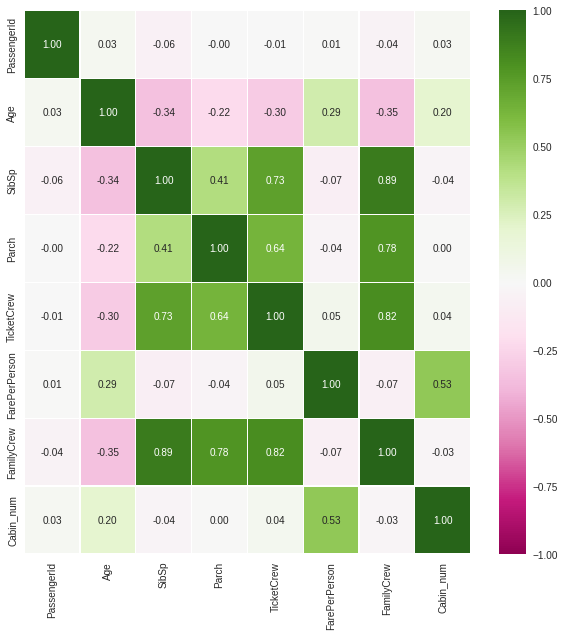

In [56]:
# train_01 = train_01.astype(float)
corr_matrix = train_01.corr(method='pearson', min_periods=train_01.shape[0])

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(corr_matrix,
                linewidths=0.3,
                fmt='.2f',
                cmap="PiYG",
                annot=True,
                vmin=-1, vmax=1);

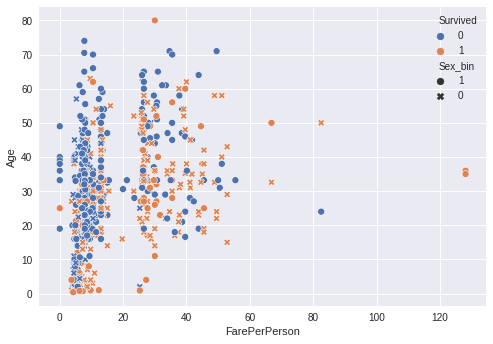

In [57]:
sns.scatterplot(data=train_01, x="FarePerPerson", y="Age", hue="Survived", style="Sex_bin", palette="deep")

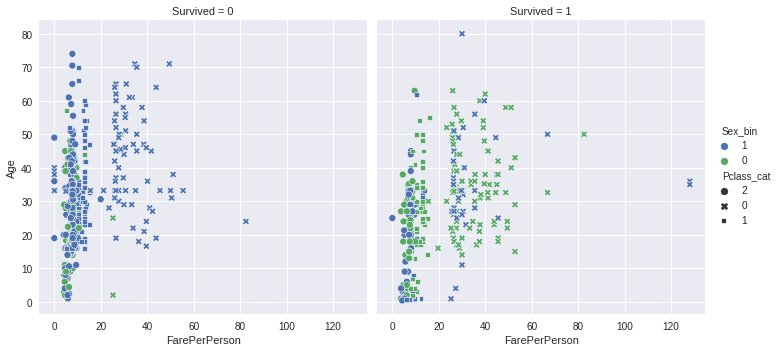

In [58]:
sns.relplot(
    data=train_01, x="FarePerPerson", y="Age",
    col="Survived", hue="Sex_bin", style="Pclass_cat",
    kind="scatter"
)

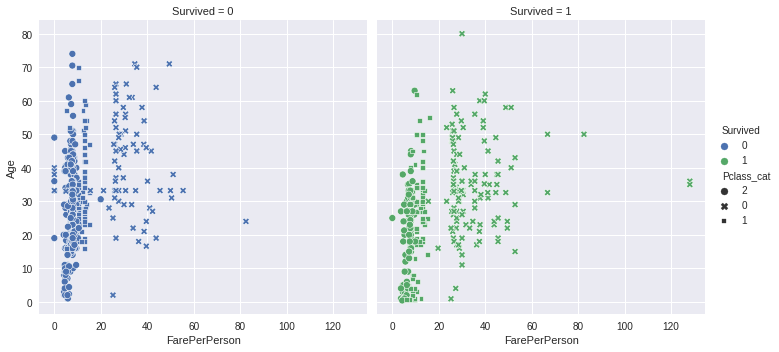

In [75]:
sns.relplot(
    data=train_01, x="FarePerPerson", y="Age",
    col="Survived", hue="Survived", style="Pclass_cat",
    kind="scatter"
)

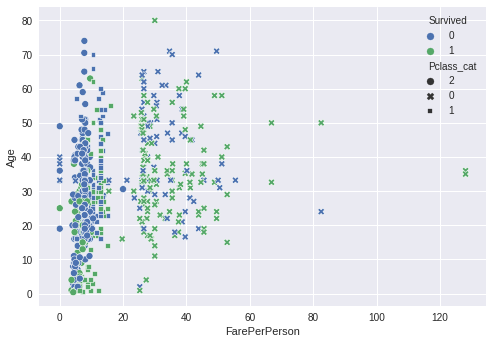

In [60]:
sns.scatterplot(
    data=train_01, x="FarePerPerson", y="Age",
    hue="Survived", style="Pclass_cat"
)

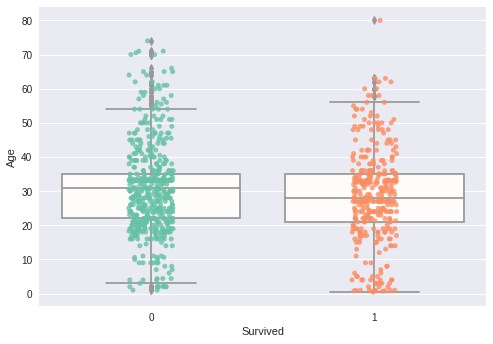

In [61]:
sns.boxplot( data=train_01, x="Survived", y="Age", color='snow')
sns.stripplot( data=train_01, x="Survived", y="Age", jitter = True, alpha=0.8, palette="Set2")

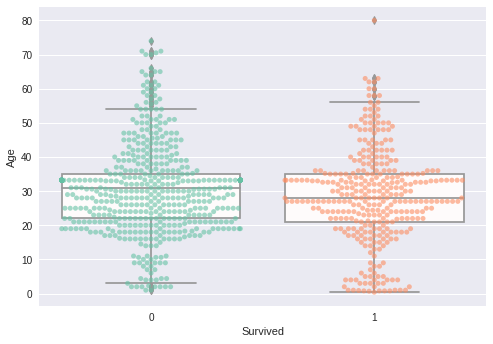

In [80]:
sns.boxplot(data=train_01, x="Survived", y="Age", color='snow')
sns.swarmplot('Survived', 'Age', data=train_01, alpha=0.6, palette="Set2")

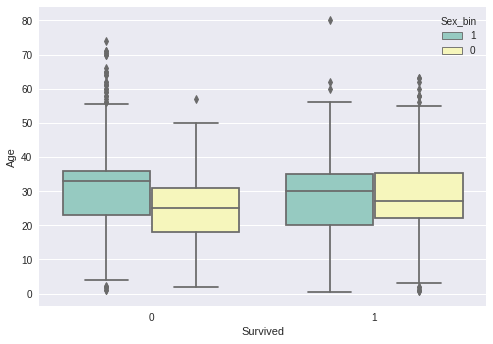

In [63]:
sns.boxplot(data=train_01, x="Survived", y="Age", hue="Sex_bin", palette="Set3")

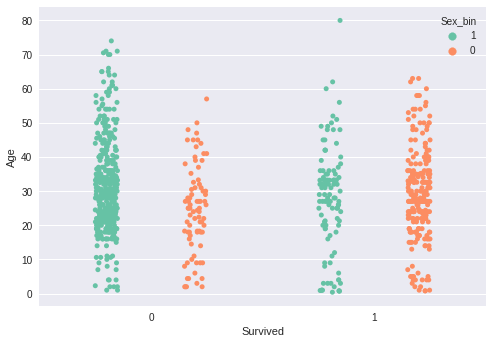

In [64]:
sns.stripplot(x="Survived", y="Age", hue="Sex_bin",
                   data=train_01, palette="Set2", dodge=True)

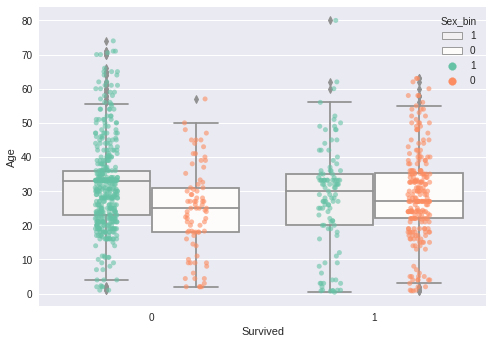

In [65]:
sns.boxplot(data=train_01, x="Survived", y="Age", hue="Sex_bin", color="snow")
sns.stripplot(x="Survived", y="Age", hue="Sex_bin",
                   data=train_01, palette="Set2", alpha=0.6, dodge=True)

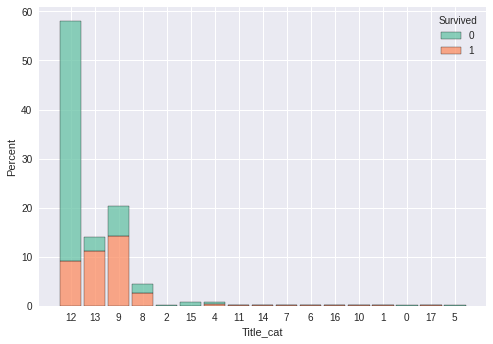

In [81]:
sns.histplot( data=train_01, x="Title_cat", hue="Survived", multiple="stack", palette="Set2",
    stat="percent", common_norm=True, discrete=True, shrink=.9)

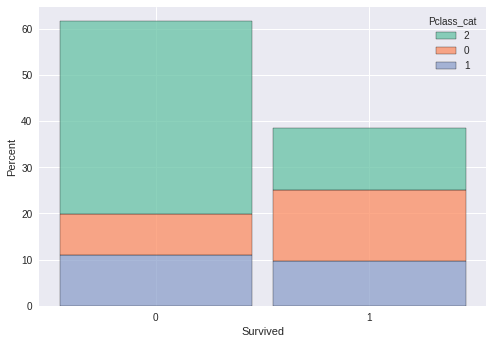

In [67]:
sns.histplot( data=train_01, x="Survived", hue="Pclass_cat", multiple="stack", palette="Set2",
    stat="percent", common_norm=True, discrete=True, shrink=.9)

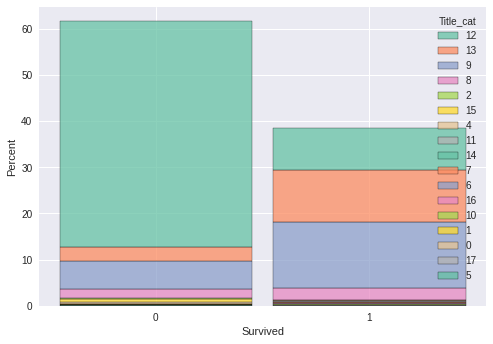

In [68]:
sns.histplot( data=train_01, x="Survived", hue="Title_cat", multiple="stack", palette="Set2",
    stat="percent", common_norm=True, discrete=True, shrink=.9)

In [69]:
inf(train_01)

Overview of dataframe 
 
 
 
 columns 
 rows 
 rows_whitout_NaN 
 rows_whit_NaN 
 rows_duplicate 
 rows_unique 
 memory_usage 
 
 
 
 
 dataframe 
 14 
 891 
 891 
 0 
 0 
 891 
 359.47 KB 
 
 
 Numeric Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 mean 
 std 
 min 
 max 
 25% 
 50% 
 75% 
 
 
 
 
 PassengerId 
 int64 
 891 
 0 
 891 
 446.000 
 257.354 
 1.0 
 891.000 
 223.500 
 446.00 
 668.500 
 
 
 Age 
 float64 
 891 
 0 
 105 
 29.801 
 13.286 
 0.4 
 80.000 
 22.000 
 30.00 
 35.000 
 
 
 SibSp 
 int64 
 891 
 0 
 7 
 0.523 
 1.103 
 0.0 
 8.000 
 0.000 
 0.00 
 1.000 
 
 
 Parch 
 int64 
 891 
 0 
 7 
 0.382 
 0.806 
 0.0 
 6.000 
 0.000 
 0.00 
 0.000 
 
 
 TicketCrew 
 int64 
 891 
 0 
 9 
 2.121 
 1.797 
 1.0 
 11.000 
 1.000 
 1.00 
 3.000 
 
 
 FarePerPerson 
 float64 
 891 
 0 
 224 
 14.551 
 13.575 
 0.0 
 128.082 
 7.496 
 8.05 
 13.825 
 
 
 FamilyCrew 
 int64 
 891 
 0 
 9 
 1.905 
 1.613 
 1.0 
 11.000 
 1.000 
 1.00 
 2.000 
 
 
 Cabin_num 
 int64 
 891 
 0 
 93 
 11.333 
 26.915 
 0.0 
 148.000 
 0.000 
 0.00 
 0.000 
 
 
 Other Features 
 
 
 
 dtypes 
 not_NaN 
 NaN 
 unique 
 top 
 freq 
 min_len 
 max_len 
 
 
 
 
 Sex_bin 
 object 
 891 
 0 
 2 
 1 
 577 
 1 
 1 
 
 
 Embarked_cat 
 object 
 891 
 0 
 4 
 2 
 644 
 1 
 2 
 
 
 Title_cat 
 object 
 891 
 0 
 17 
 12 
 517 
 1 
 2 
 
 
 Deck_cat 
 object 
 891 
 0 
 8 
 7 
 691 
 1 
 1 
 
 
 Pclass_cat 
 object 
 891 
 0 
 3 
 2 
 491 
 1 
 1 
 
 
 Survived 
 object 
 891 
 0 
 2 
 0 
 549 
 1 
 1 
 
 
 Sample of dataframe 
 
 
 
 PassengerId 
 Age 
 SibSp 
 Parch 
 TicketCrew 
 FarePerPerson 
 FamilyCrew 
 Cabin_num 
 Sex_bin 
 Embarked_cat 
 Title_cat 
 Deck_cat 
 Pclass_cat 
 Survived 
 
 
 
 
 805 
 806 
 31.0 
 0 
 0 
 1 
 7.775 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 0 
 
 
 688 
 689 
 18.0 
 0 
 0 
 1 
 7.796 
 1 
 0 
 1 
 2 
 12 
 7 
 2 
 0 
 
 
 188 
 189 
 40.0 
 1 
 1 
 2 
 7.750 
 3 
 0 
 1 
 1 
 12 
 7 
 2 
 0

##Predictive Modeling

###Separe test and train

In [ ]:
yAll = train_01["Survived"]
xAll = train_01.drop("Survived", axis=1)

xTrain, xTest, yTrain, yTest = train_test_split(xAll,yAll,
                                    test_size = 0.3, 
                                    random_state = 0,
                                    stratify=yAll, # stratify uses yAll information to obtain proportionally distributed subsets  
                               )

print(f'xAll.shape: {xAll.shape} and yAll.shape: {yAll.shape}')
print(f'xTrain.shape: {xTrain.shape} and xTest.shape: {xTest.shape}')
print(f'yTrain.shape: {yTrain.shape} and yTest.shape: {yTest.shape}')

xAll.shape: (891, 13) and yAll.shape: (891,)
xTrain.shape: (623, 13) and xTest.shape: (268, 13)
yTrain.shape: (623,) and yTest.shape: (268,)


In [ ]:
xTrain.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
       'FamilyCrew', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
       'Deck_cat', 'Pclass_cat'],
      dtype='object')

In [ ]:
col = ['Age', 'Sex_bin', 'Title_cat', 'Pclass_cat']

# col_01 = ['Age', 'FamilyCrew', 'FarePerPerson', 'Sex_bin',
#           'Deck_cat', 'Title_cat', 'Pclass_cat']

# col_02 = ['Age', 'SibSp', 'Parch', 'TicketCrew', 'FarePerPerson',
#        'FamilyCrew', 'Cabin_num', 'Sex_bin', 'Embarked_cat', 'Title_cat',
#        'Deck_cat', 'Pclass_cat']

###Decision Tree

In [ ]:
%%time

clf_0 = tree.DecisionTreeClassifier()
clf_0 = clf_0.fit(xTrain[col], yTrain)
yPred_train = clf_0.predict(xTrain[col])
yPred_test = clf_0.predict(xTest[col])
clf_train = classification_report(yTrain, yPred_train)
clf_test = classification_report(yTest, yPred_test)
print("Train")
print(clf_train)
print()
print("Test")
print(clf_test)

Train
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       384
           1       0.94      0.80      0.86       239

    accuracy                           0.90       623
   macro avg       0.91      0.88      0.89       623
weighted avg       0.91      0.90      0.90       623


Test
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       165
           1       0.88      0.71      0.78       103

    accuracy                           0.85       268
   macro avg       0.86      0.82      0.84       268
weighted avg       0.85      0.85      0.85       268

CPU times: user 49.1 ms, sys: 0 ns, total: 49.1 ms
Wall time: 50.2 ms


In [ ]:
%%time

clsf = DecisionTreeClassifier()
max_depth_range=range(1, 20)
min_samples_leaf_range=range(1, 50)
min_samples_split_range=range(2,10)
 
paramSpace = {
    'criterion': ['entropy', 'gini'], 
    'max_depth': max_depth_range,
    'min_samples_leaf': min_samples_leaf_range,
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'min_samples_split': min_samples_split_range
}

scoringMetric = make_scorer(accuracy_score)

# make_scorer(precision_score)
# make_scorer(recall_score)


gs = GridSearchCV(clsf, param_grid=paramSpace, scoring=scoringMetric, cv=5)
gs.fit(xTrain[col],yTrain)
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
%%time

clsf =  DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, max_features=None, min_samples_split=2)
clsf.fit(xTrain[col],yTrain)
yPred_train = clsf.predict(xTrain[col])
yPred_test = clsf.predict(xTest[col])
clf_train = classification_report(yTrain, yPred_train)
clf_test = classification_report(yTest, yPred_test)

print("TRAIN")
print(clf_train)
print("ASE (RMSE)")
print(mean_squared_error(yTrain, yPred_train, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTrain, yPred_train, squared=True))
print()
print()
print("TEST")
print(clf_test)
print("ASE (RMSE)")
print(mean_squared_error(yTest, yPred_test, squared=False))
print("ASE (MSE)")
print(mean_squared_error(yTest, yPred_test, squared=True))
print()
print()

TRAIN
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       384
           1       0.80      0.70      0.75       239

    accuracy                           0.82       623
   macro avg       0.81      0.80      0.80       623
weighted avg       0.82      0.82      0.81       623

ASE (RMSE)
0.4277681074742139
ASE (MSE)
0.18298555377207062


TEST
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       165
           1       0.85      0.64      0.73       103

    accuracy                           0.82       268
   macro avg       0.83      0.78      0.80       268
weighted avg       0.82      0.82      0.81       268

ASE (RMSE)
0.4275930552470683
ASE (MSE)
0.1828358208955224


CPU times: user 55.3 ms, sys: 504 µs, total: 55.8 ms
Wall time: 54.2 ms


ROC


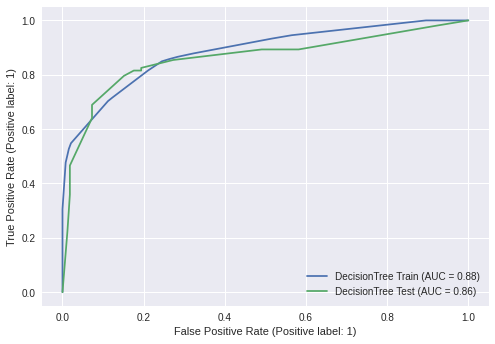

In [ ]:
print('ROC')
disp = plot_roc_curve(clsf, xTrain[col], yTrain, name='DecisionTree Train');
plot_roc_curve(clsf, xTest[col], yTest, ax=disp.ax_, name='DecisionTree Test');

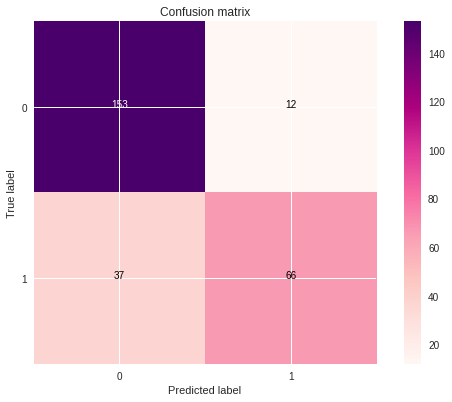

In [ ]:
cm=confusion_matrix(yTest, yPred_test)
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix', # This is an optional parameter with a default value
                          cmap=plt.cm.RdPu         # Selecting the blue tone palette of colors
                         ): # This is a python function
    """
    This function prints and plots the confusion matrix.
    """
    plt.clf() 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(cm, ["0","1"])

##Submission

In [ ]:
yTrain = train_01["Survived"]
xTrain = train_01.drop("Survived", axis=1)
xTest = test_01

print(f'xTrain.shape: {xTrain.shape} and xTest.shape: {xTest.shape}')
print(f'yTrain.shape: {yTrain.shape}')

xTrain.shape: (891, 13) and xTest.shape: (418, 13)
yTrain.shape: (891,)


In [ ]:
%%time

clsf =  DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, max_features=None, min_samples_split=2)
clsf.fit(xTrain[col],yTrain)
yPred_train = clsf.predict(xTrain[col])
yPred_test = clsf.predict(xTest[col])
clf_train = classification_report(yTrain, yPred_train)

print("Train")
print(clf_train)

Train
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       549
           1       0.88      0.64      0.74       342

    accuracy                           0.83       891
   macro avg       0.84      0.79      0.81       891
weighted avg       0.84      0.83      0.82       891

CPU times: user 51 ms, sys: 0 ns, total: 51 ms
Wall time: 53.4 ms


Confusion matrix


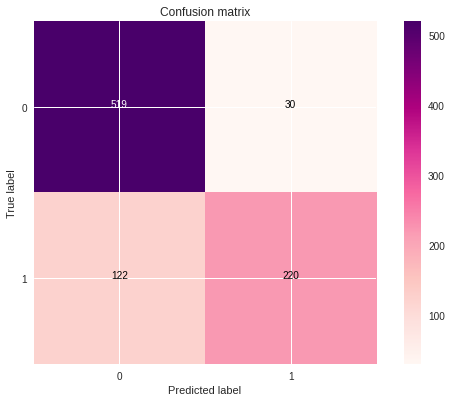

In [ ]:
print("Confusion matrix")
cm=confusion_matrix(yTrain, yPred_train)
plot_confusion_matrix(cm, ["0","1"])

In [ ]:
submission = pd.DataFrame({
        "PassengerId": xTest["PassengerId"],
        "Survived": yPred_test
     })
submission.to_csv(f'{staging}/submission.csv', index=False)

'''
Submission File Format:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

'''

def local_time():
    # dd/mm/YY H:M:S
    print("Finished at " + datetime.datetime.now().strftime("%H:%M:%S"))	

local_time()

Finished at 19:11:18


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Survived     418 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.8+ KB


### Kaggle score
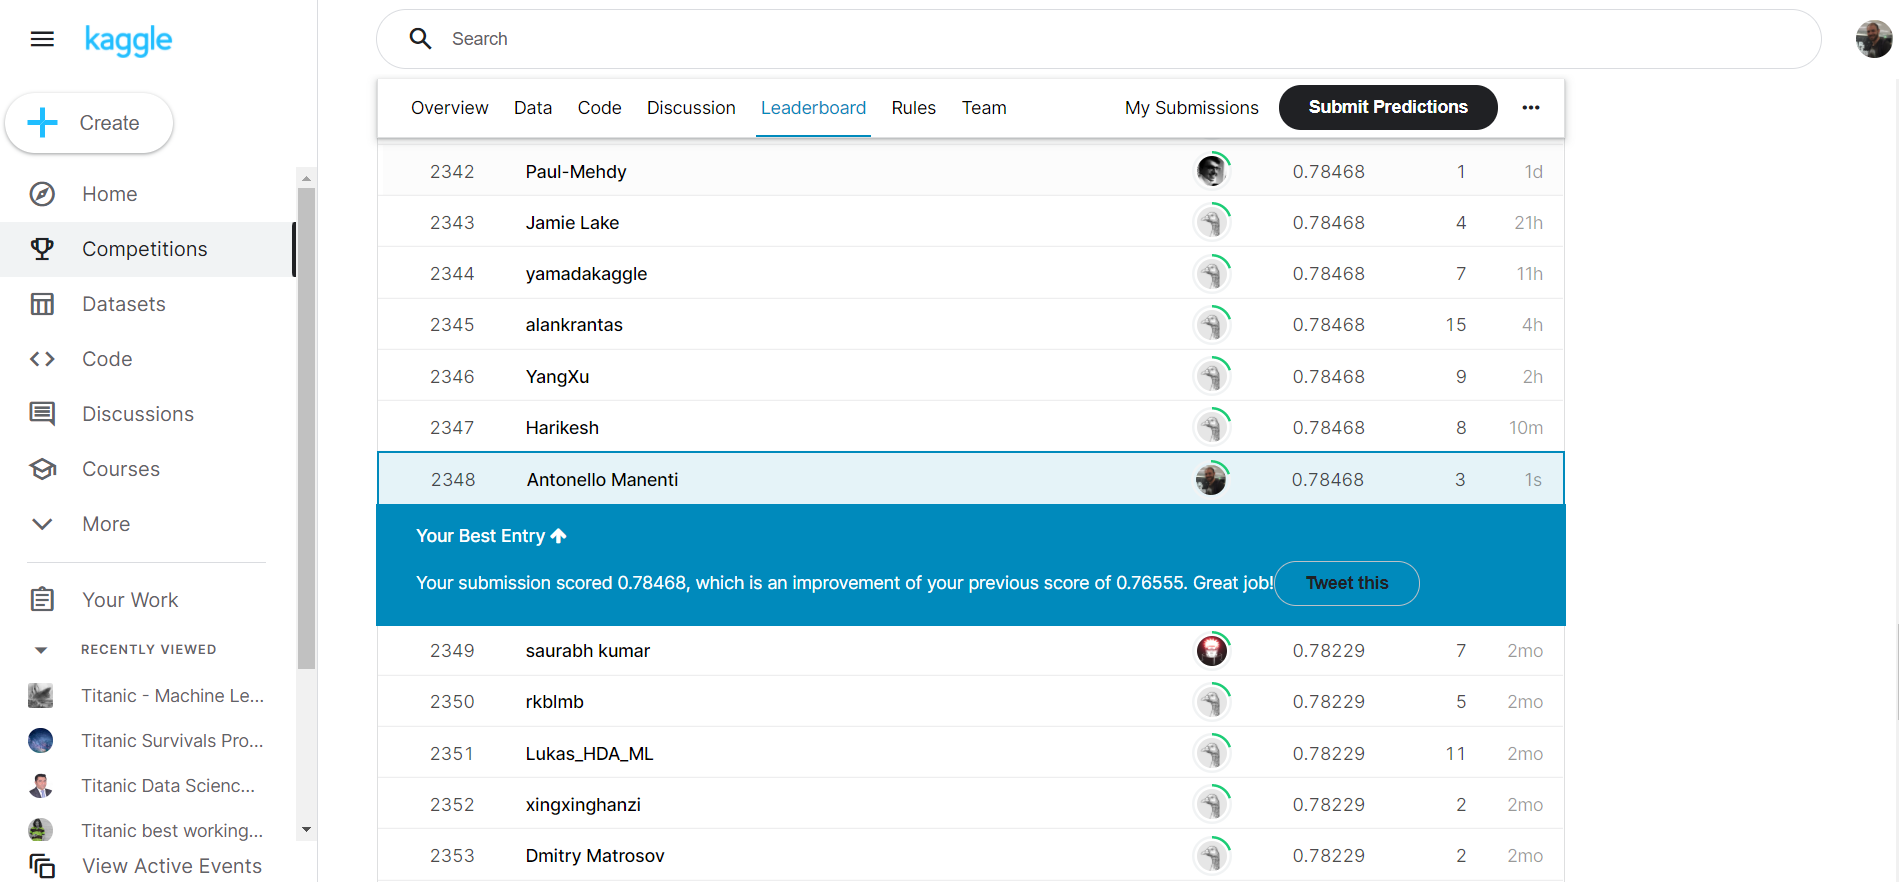

My accuracy is 0.78468. I ranked 2348th out of 13879th (06/01/2022).

Best 17% 💪

The default gender_submission's score is 0.76555!